In [3]:
library(lattice)
eta=0.001
epsilon=1e-6
maxiter=10000

In [5]:
gradientDesc <- function(learn_rate, conv_threshold, max_iter) {
  # Initialize parameters
  x <- -1    # Initial x
  y <- 1     # Initial y
  params <- c(x, y) # Parameter vector [x, y]
  
  # Initial loss (Rosenbrock function)
  loss <- (1 - x)^2 + 100 * (y - x^2)^2
  
  # Initialize history
  iterations <- 0
  loss_history <- numeric(max_iter)
  params_history <- matrix(0, nrow = max_iter, ncol = 2)
  
  converged <- FALSE
  while (!converged) {
    # Compute gradients
    grad_x <- -2 * (1 - x) - 400 * x * (y - x^2)
    grad_y <- 200 * (y - x^2)
    grad <- c(grad_x, grad_y)
    
    # Update parameters
    params <- params - learn_rate * grad
    x <- params[1]
    y <- params[2]
    
    # Compute new loss
    loss_new <- (1 - x)^2 + 100 * (y - x^2)^2
    
    # Store history
    loss_history[iterations + 1] <- loss_new
    params_history[iterations + 1, ] <- c(x, y)
    
    # Check convergence based on gradient norm
    grad_norm <- sqrt(sum(grad^2))
    if (grad_norm < conv_threshold) {
      converged <- TRUE
      cat("Optimal parameters: x =", x, ", y =", y, "\n")
      cat("Iterations:", iterations, "\n")
      cat("Final Loss:", loss_new, "\n")
      break
    }
    
    # Update loss and iteration count
    loss <- loss_new
    iterations <- iterations + 1
    
    # Check max iterations
    if (iterations >= max_iter) {
      converged <- TRUE
      cat("Optimal parameters: x =", x, ", y =", y, "\n")
      cat("Iterations:", iterations, "\n")
      cat("Final Loss:", loss_new, "\n")
      break
    }
  }
  
  # Trim history
  loss_history <- loss_history[1:iterations]
  params_history <- params_history[1:iterations, ]
  
  # Return results
  return(list(params = c(x, y), loss = loss_new, iterations = iterations,
              loss_history = loss_history, params_history = params_history))
}

In [9]:
result=gradientDesc(eta,epsilon,maxiter)

Optimal parameters: x = 0.9924817 , y = 0.9849898 
Iterations: 10000 
Final Loss: 5.661569e-05 


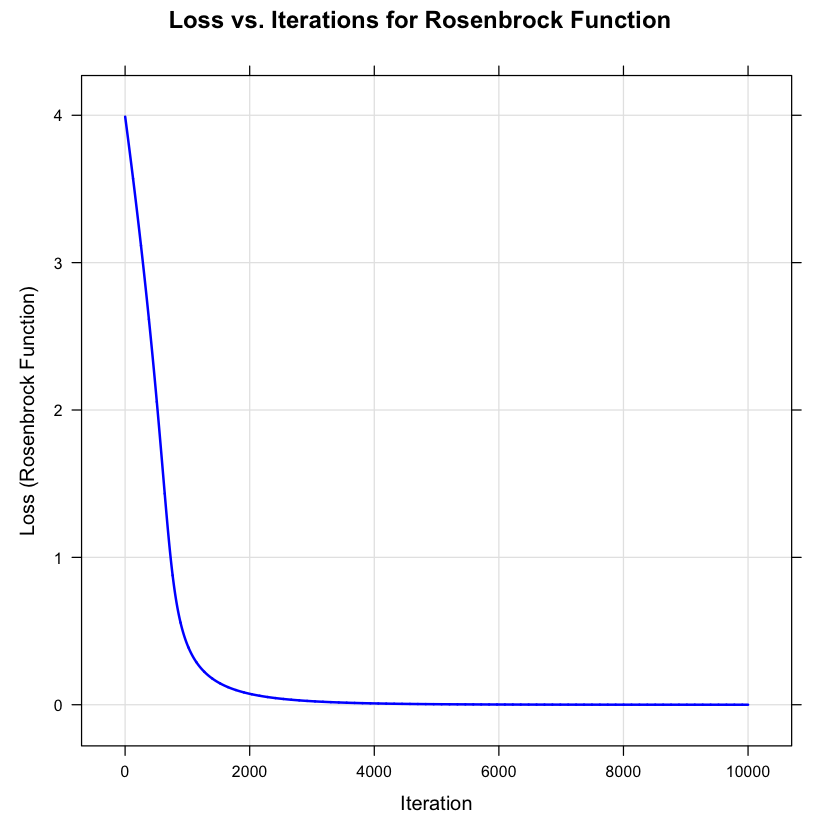

In [29]:

xyplot(
  result$loss_history ~ seq_along(result$loss_history),
  type = "l",
  xlab = "Iteration",
  ylab = "Loss (Rosenbrock Function)",
  main = "Loss vs. Iterations for Rosenbrock Function",
  col = "blue",
  lwd = 2,
  grid = TRUE
)


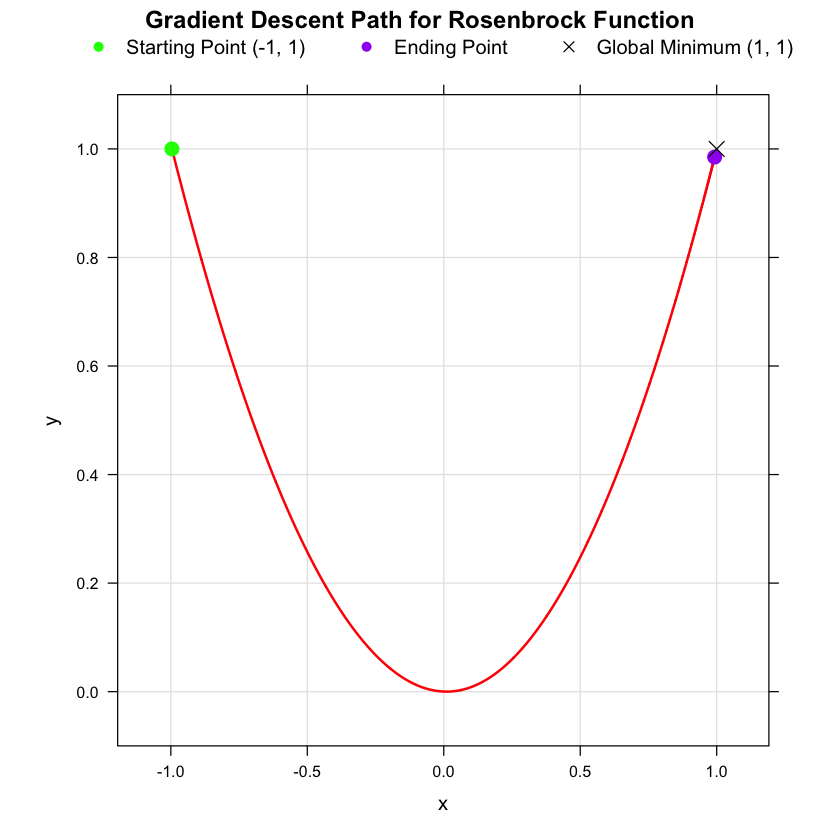

In [27]:

x_vals <- result$params_history[,1]
y_vals <- result$params_history[,2]
x_range <- range(x_vals, na.rm = TRUE)
y_range <- range(y_vals, na.rm = TRUE)

# Add a 10% buffer to the ranges, ensure non-zero width
x_buffer <- diff(x_range) * 0.1
if (x_buffer == 0) x_buffer <- 0.1 # Minimum buffer for degenerate range
y_buffer <- diff(y_range) * 0.1
if (y_buffer == 0) y_buffer <- 0.1 # Minimum buffer for degenerate range

x_limits <- c(x_range[1] - x_buffer, x_range[2] + x_buffer)
y_limits <- c(y_range[1] - y_buffer, y_range[2] + y_buffer)

# 2. Path Plot of x and y
xyplot(
  result$params_history[,2] ~ result$params_history[,1], # y vs. x
  type = "l",
  xlab = "x",
  ylab = "y",
  main = "Gradient Descent Path for Rosenbrock Function",
  col = "red",
  lwd = 2,
  grid = TRUE,
  aspect = 1, # Square aspect ratio for balanced visualization
  scales = list(
    x = list(limits = x_limits),
    y = list(limits = y_limits)
  ),
  panel = function(x, y, ...) {
    panel.xyplot(x, y, ...)
    # Add starting point
    panel.points(x[1], y[1], pch = 16, col = "green", cex = 1.5)
    # Add ending point
    panel.points(x[length(x)], y[length(y)], pch = 16, col = "purple", cex = 1.5)
    # Add global minimum for reference
    panel.points(1, 1, pch = 4, col = "black", cex = 1.5)
  },
  key = list(
    space = "top",
    points = list(pch = c(16, 16, 4), col = c("green", "purple", "black")),
    text = list(c("Starting Point (-1, 1)", "Ending Point", "Global Minimum (1, 1)")),
    columns = 3
  )
)
